# This task is to understand boston dataset using **ElasticNet Regression** model

In [1]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing boston dataset from sklearn

from sklearn.datasets import load_boston

In [3]:
# Initial data load

boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
dataset['PRICE'] = boston.target

In [6]:
# Identifying independent and dependent feature

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [7]:
# Creating training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# Data analysis on X_train and y_train

print(type(X_train), len(X_train), type(y_train), len(y_train))

<class 'pandas.core.frame.DataFrame'> 379 <class 'pandas.core.series.Series'> 379


In [9]:
# Data analysis on X_test and y_test

print(type(X_test), len(X_test), type(y_test), len(y_test))

<class 'pandas.core.frame.DataFrame'> 127 <class 'pandas.core.series.Series'> 127


In [10]:
## Standardizing the datasets

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
# Calculate mean and standard deviation
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
## Model training

In [14]:
from sklearn.linear_model import ElasticNet

In [15]:
elasticnet = ElasticNet()

In [16]:
elasticnet.fit(X_train, y_train)

ElasticNet()

In [17]:
for index, feature in enumerate(boston.feature_names):
  print(feature.ljust(10), " :", "{0:+f}".format(elasticnet.coef_[index]))

CRIM        : -0.419944
ZN          : +0.000000
INDUS       : -0.182200
CHAS        : +0.478972
NOX         : -0.223266
RM          : +2.529099
AGE         : -0.000000
DIS         : -0.000000
RAD         : -0.000000
TAX         : -0.313280
PTRATIO     : -1.229945
B           : +0.586115
LSTAT       : -2.460488


In [18]:
print(elasticnet.intercept_)

22.90791556728235


In [19]:
elasticnet_prediction = elasticnet.predict(X_test)

In [20]:
elasticnet_prediction

array([26.09753157, 30.60422387, 17.93003017, 24.61895326, 19.11266232,
       23.03039446, 19.87464954, 16.52415011, 20.85172381, 21.02616687,
       23.02494106, 22.41422207,  2.05651025, 22.82528562, 20.9674675 ,
       23.58680059, 19.3009252 ,  9.00292299, 34.84991024, 18.28714935,
       25.38878581, 26.56898322, 16.08748498, 23.80569019, 18.08664586,
       15.62720302, 22.74644433, 17.37057981, 22.25533751, 20.28379197,
       21.18879469, 25.10204636, 23.42965489, 18.20040427, 16.59779283,
       20.03121359, 29.96118069, 22.06248917, 23.4426774 , 24.45832002,
       16.43528678, 27.43333806, 35.26330399, 20.61066675, 25.61286529,
       17.10632309, 17.49977047, 25.39527836, 19.35958155, 28.77015846,
       23.82296776, 30.77428111, 19.17480092, 25.2103103 , 33.67243746,
       21.81069498, 19.06400821, 28.48712918, 24.97604778, 18.62719169,
       25.56952442, 30.19209316, 27.77529626, 18.48345773, 26.83497013,
       18.09411867, 19.67661968, 25.36762706, 27.69919628, 14.89

In [21]:
# Assumptions

Text(0, 0.5, 'Test prediction data')

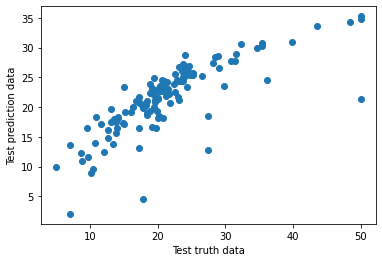

In [22]:
plt.scatter(y_test, elasticnet_prediction)
plt.xlabel('Test truth data')
plt.ylabel('Test prediction data')

Text(0, 0.5, 'Test prediction data')

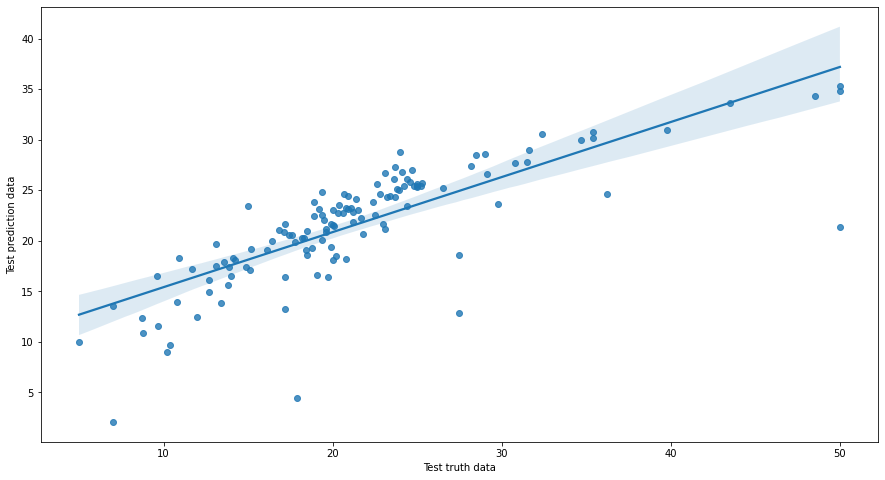

In [23]:
plt.subplots(figsize=(15, 8))
sns.regplot(x = y_test, y = elasticnet_prediction)
plt.xlabel('Test truth data')
plt.ylabel('Test prediction data')

In [24]:
residuals = y_test - elasticnet_prediction

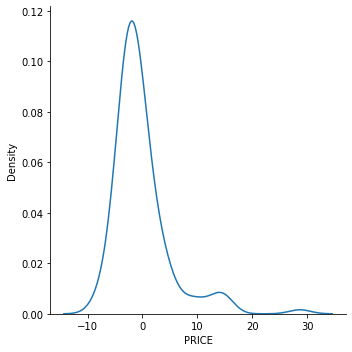

In [25]:
sns.displot(residuals, kind="kde")

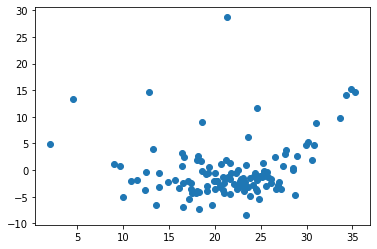

In [26]:
plt.scatter(elasticnet_prediction, residuals)

In [27]:
# Cost function analysis

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
MSE = mean_squared_error(y_test, elasticnet_prediction)
MAE = mean_absolute_error(y_test, elasticnet_prediction)

print("Mean Squared Error", MSE)
print("Mean Absolute Error", MAE)
print("Root Mean Squared Error", np.sqrt(MAE))

Mean Squared Error 26.54097051831717
Mean Absolute Error 3.4604535710209277
Root Mean Squared Error 1.8602294404241988


In [30]:
# Performance metrics

In [31]:
from sklearn.metrics import r2_score

In [32]:
score = r2_score(y_test, elasticnet_prediction)
adj_score = 1 - ((1-score) * (len(y_test) - 1 ))/( len(y_test) - X_test.shape[1] - 1)

In [33]:
print('R Squared', score)
print('Adjusted R Squared', adj_score)

R Squared 0.6209902455918286
Adjusted R Squared 0.5773873534917735
